### Importando e conhecendo os dados

In [1]:
# Importando as bibliotecas necessárias para o projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
# Carregando os dados
dados = pd.read_csv('imigrantes_canada.csv')
dados.head()

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [3]:
# Verificando se há algum valor nulo ou os tipos dos dados estejam incorretos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

### Analisar as tendências de imigração do Brasil em um determinado periodo

In [4]:
# Selecionando a coluna país como o indice da tabela
dados.set_index('País', inplace=True)

In [5]:
# É interessante criar uma lista com os anos de 1980 a 2013 para retornar os valores desses anos
# Criando uma variavel anos para alocar esses valores
anos = list(map(str,range(1980,2014)))
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [6]:
# Agora podemos utilizar esses anos para retorna a quantidade de imigrantes do Brasil
brasil = dados.loc['Brasil', anos]  # Os dados que retorna são apenas do Brasil seguindo os anos informados na lista
brasil

1980     211
1981     220
1982     192
1983     139
1984     145
1985     130
1986     205
1987     244
1988     394
1989     650
1990     650
1991     877
1992    1066
1993     866
1994     566
1995     572
1996     586
1997     591
1998     531
1999     626
2000     845
2001     847
2002     745
2003     839
2004     917
2005     969
2006    1181
2007    1746
2008    2138
2009    2509
2010    2598
2011    1508
2012    1642
2013    1714
Name: Brasil, dtype: object

In [7]:
# Agora é criar um dataframe a partir desses dados
brasil_dict = {'Anos': brasil.index.tolist() , 'Imigrante': brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dict)

In [8]:
# Visualizando
dados_brasil

,Anos,Imigrante
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145
5,1985,130
6,1986,205
7,1987,244
8,1988,394
9,1989,650


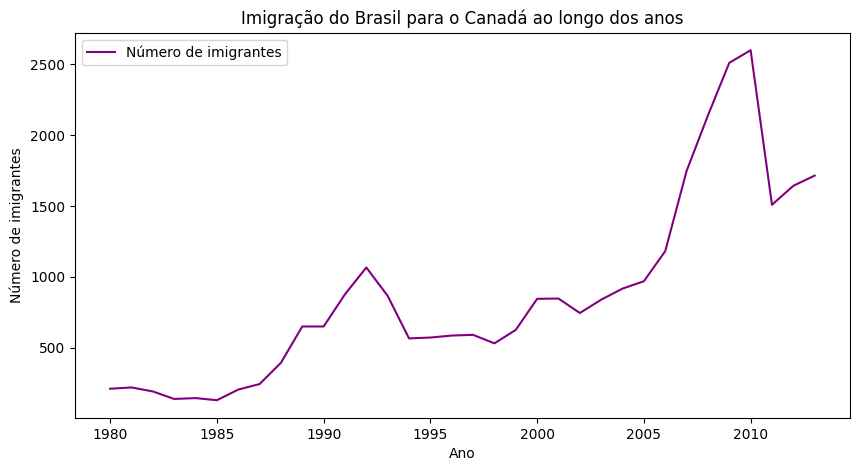

In [9]:
# Criando um gráfico com o plot em pandas
dados_brasil.plot(x='Anos', y='Imigrante', 
                  xlabel='Ano', ylabel='Número de imigrantes',
                  kind='line', figsize=(10,5), color='purple', 
                  label = 'Número de imigrantes',
                  title='Imigração do Brasil para o Canadá ao longo dos anos');

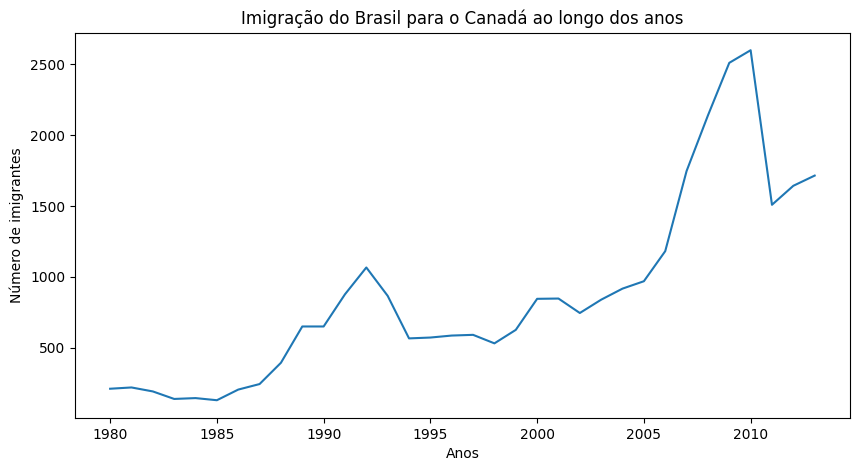

In [10]:
# Criando o gráfico usando o matplotlib
plt.figure(figsize=(10,5))
plt.plot(dados_brasil['Anos'], dados_brasil['Imigrante'])
plt.xticks(['1980','1985','1990','1995','2000','2005','2010']) # A função xticks dita o intervalo de valores do eixo x
plt.xlabel('Anos')
plt.ylabel('Número de imigrantes')
plt.title('Imigração do Brasil para o Canadá ao longo dos anos')
plt.show()

## Desafio: comparando tendências de imigração

Chegou a hora de você testar os conhecimentos desenvolvidos durante a aula. Nós criamos um gráfico com a função plt.plot() para analisar as intrigantes tendências de imigração do Brasil para o Canadá, no período de 1980 a 2013. Neste momento temos uma nova demanda: criar um gráfico de linhas comparando os números de imigrantes do Brasil e Argentina para o Canadá, que são os maiores países da América do Sul.

Prepare-se para um mergulho fascinante nas linhas que conectam esses países da América do Sul ao território canadense. Nessa missão, a elaboração desse gráfico pode ser útil para a compreensão das tendências migratórias desses países para o Canadá ao longo do tempo e como elas se comparam entre si. Ao analisar esses fatores, podemos obter uma visão mais abrangente do cenário migratório na América do Sul.

In [11]:
# Primeiro temos que entender que precisamos também dos dados da Argentina, já temos os dados dos anos necessário os imigrantes
argentina = dados.loc[['Brasil','Argentina'], anos]  # Retornando um conjunto porem com duas linhas e os anos como coluna
paises_sulamerica = argentina.T  # Usando o T = Transposer para rotacionar a tabela

In [12]:
# Visualizando 
paises_sulamerica.head()

País,Brasil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237


Após criar o gráfico analise o resultado obtido e reflita nas seguintes questões:

- Há alguma tendência ou padrão comum nos dados dos dois países? Resp: Ouve um padrão sim, ouve uma tendência até os anos 2000
- Quais são os períodos com maior número de imigrantes nos dois países? 
Resp: A partir dos anos 2000 ambos tiveram um crescimento, a argentina crescendo a partir dos anos 2000 até 2005, já o brasil começa a partir de 2005 tendo seu pico em 2010

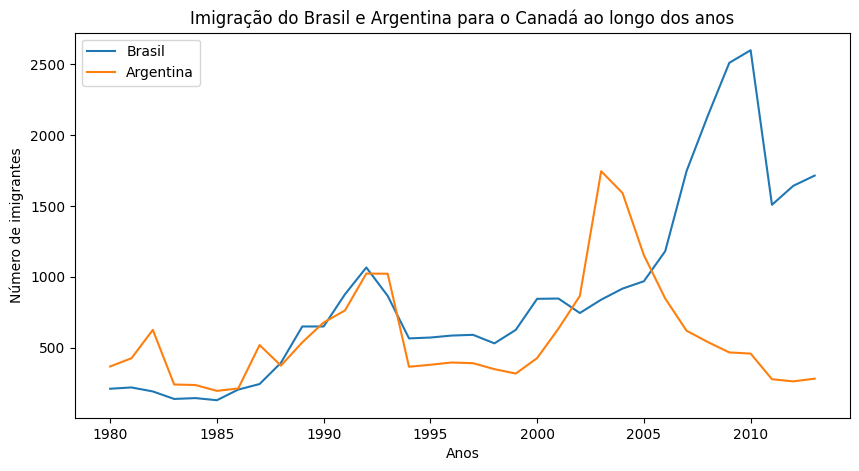

In [13]:
# Criando o gráfico usando o matplotlib
plt.figure(figsize=(10,5))
plt.plot(paises_sulamerica['Brasil'], label='Brasil')
plt.plot(paises_sulamerica['Argentina'], label='Argentina')
plt.xticks(['1980','1985','1990','1995','2000','2005','2010']) 
plt.xlabel('Anos')
plt.ylabel('Número de imigrantes')
plt.title('Imigração do Brasil e Argentina para o Canadá ao longo dos anos')
plt.legend()
plt.show()

#### Criando uma figura

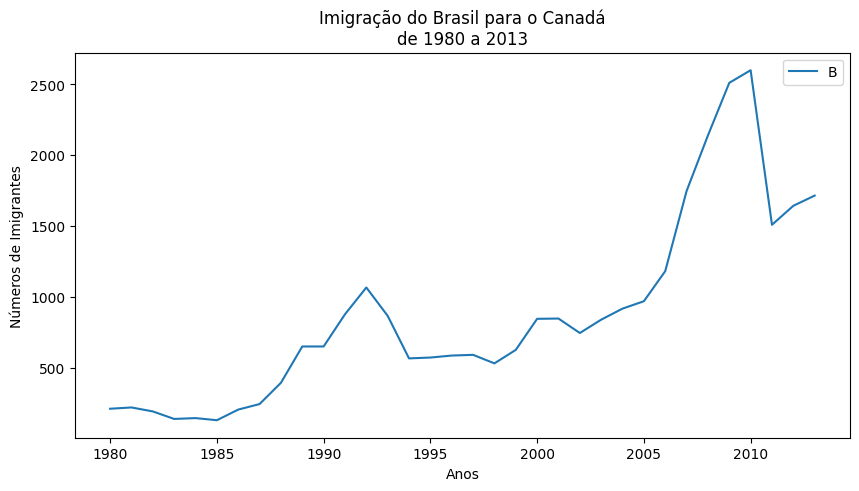

In [14]:
# Usando a função do subplot para criar uma figura do grafico
fig, ax= plt.subplots(figsize=(10,5))
ax.plot(dados_brasil['Anos'], dados_brasil['Imigrante']) 
ax.set_title('Imigração do Brasil para o Canadá\nde 1980 a 2013')
ax.set_xlabel('Anos')
ax.set_ylabel('Números de Imigrantes')
ax.legend('Brasil')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

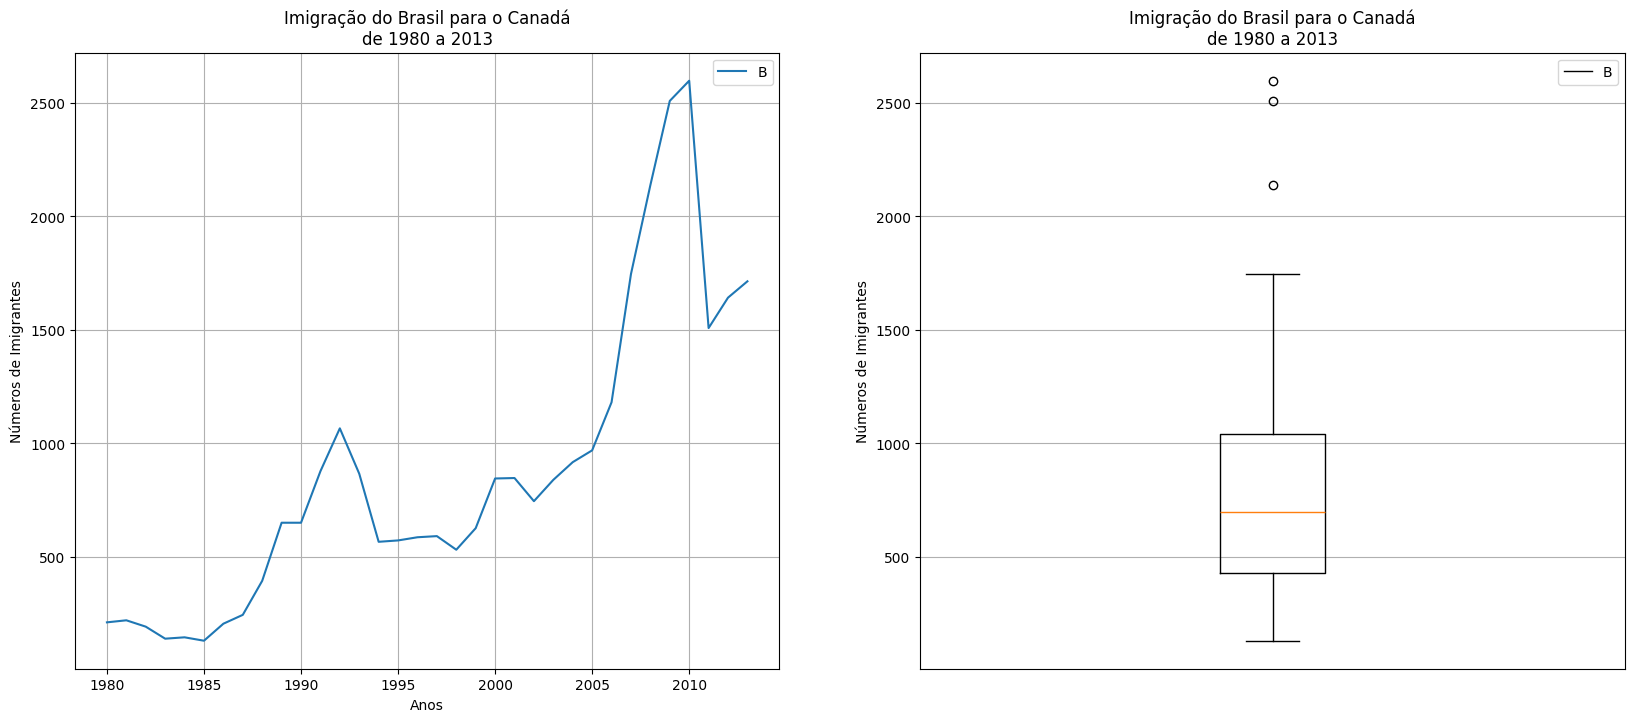

In [18]:
# Criando uma subplot com 2 graficos na mesma linha para analisar a quantidade por periodo 
fig, axs= plt.subplots(1,2,figsize=(20,8))
axs[0].plot(dados_brasil['Anos'], dados_brasil['Imigrante'])
axs[0].set_title('Imigração do Brasil para o Canadá\nde 1980 a 2013')
axs[0].set_xlabel('Anos')
axs[0].set_ylabel('Números de Imigrantes')
axs[0].legend('Brasil')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].grid()

axs[1].boxplot(dados_brasil['Imigrante'])
axs[1].set_title('Imigração do Brasil para o Canadá\nde 1980 a 2013')
axs[1].set_ylabel('Números de Imigrantes')
axs[1].legend('Brasil')
axs[1].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[1].grid()

plt.show()

In [19]:
# Para comparar o boxplot e validar os dados usando um describe
dados_brasil.describe()

,Imigrante
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


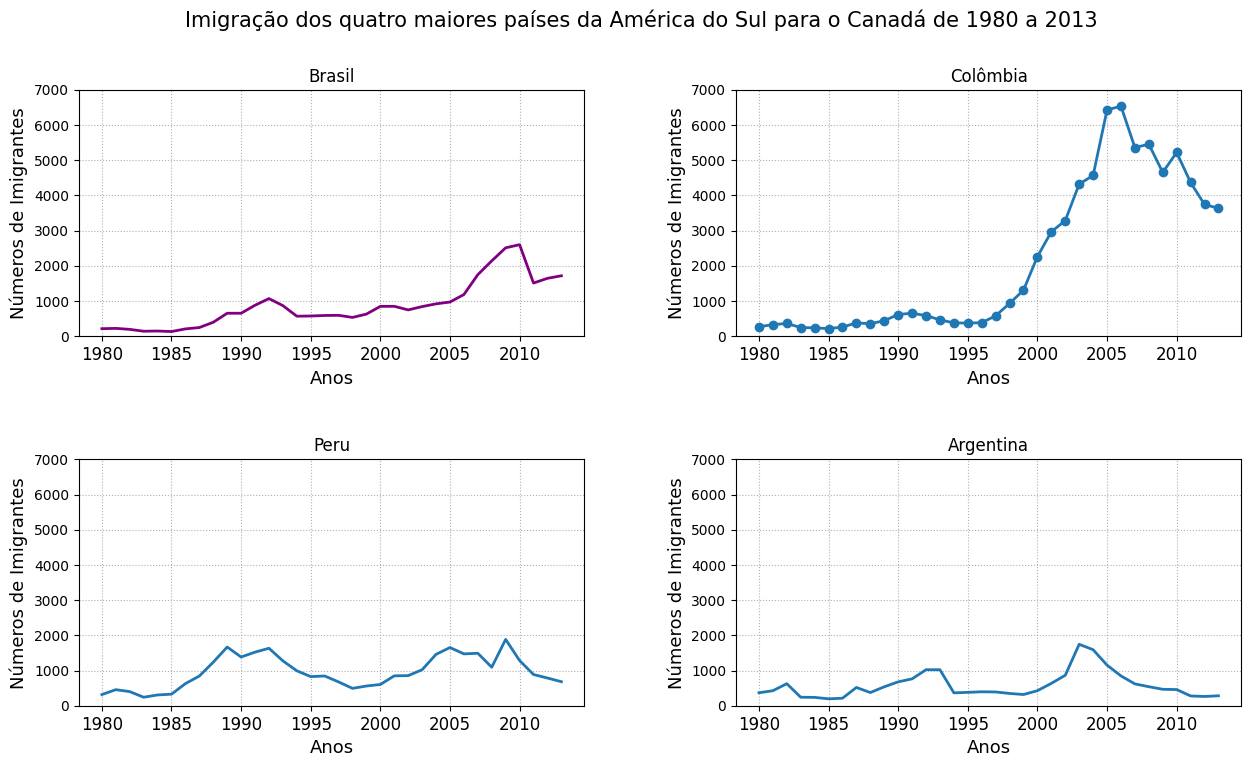

In [70]:
# Criando um subplot para os quatro primeiros paises sulamericanos com maior numero de imigrantes 
fig, axs = plt.subplots(2,2, figsize=(15,8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Imigração dos quatro maiores países da América do Sul para o Canadá de 1980 a 2013', fontsize=15)

axs[0,0].plot(dados.loc['Brasil', anos], lw=2, color='purple')
axs[0,0].set_title('Brasil')

axs[0,1].plot(dados.loc['Colômbia', anos], lw=2, marker='o')
axs[0,1].set_title('Colômbia')

axs[1,0].plot(dados.loc['Peru', anos], lw=2)
axs[1,0].set_title('Peru')

axs[1,1].plot(dados.loc['Argentina', anos], lw=2)
axs[1,1].set_title('Argentina')


# Usando um For para adicionar os ajustes dos anos e adicionar as legendas
for ax in axs.flat:
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax.set_xlabel('Anos', fontsize=13)
    ax.set_ylabel('Números de Imigrantes', fontsize=13)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=10)
    ax.grid(linestyle=':')


# Criando um limite para os eixos dos graficos

ymin = 0
ymax = 7000

# Usando um For para passar os limites
for ax in axs.ravel():
    ax.set_ylim(ymin,ymax)

plt.show()